<a href="https://colab.research.google.com/github/CanKeles5/SequenceModels/blob/main/TEIA%C5%9E_LSTM_predict_NG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To-Do:
  Train using only one feature. NaturalGas

  Inspect the data and drop columns that are too sparse. See how many of the values in each col are zero.

++++ 1-  Give all features except total and natural gas and predict NG.


2-  Use 1-2 years data and do forecasting. 

In [1]:
import torch
torch.cuda.is_available()
if torch.cuda.is_available():
  dev = "cuda:0"
else:
  dev = "cpu"
device = torch.device(dev)

In [2]:
device

device(type='cpu')

In [3]:
%matplotlib inline

In [4]:
! pip install pickle5

     |████████████████████████████████| 133kB 8.3MB/s 
  Created wheel for pickle5: filename=pickle5-0.0.11-cp36-cp36m-linux_x86_64.whl size=218617 sha256=c4b13b14e0f24296abd5a6393263c87932dc1b6a11cb78596f284249e82a0979
  Stored in directory: /root/.cache/pip/wheels/a6/90/95/f889ca4aa8b0e0c7f21c8470b6f5d6032f0390a3a141a9a3bd
Successfully built pickle5


In [5]:
import pickle5
from math import sqrt
from datetime import datetime
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [6]:
with open('/content/20210101-epias-raw.pkl', 'rb') as f:
    data = pickle5.load(f)

Drop all colums of zeros: df.loc[:, (df != 0).any(axis=0)]


In [7]:
new_data = data.loc[:, (data != 0).any(axis=0)] #(index=False)

In [9]:
new_data.shape

(67268, 24)

In [13]:
new_data = new_data[0:67268-24*300]

In [15]:
new_data.shape

(60068, 24)

In [16]:
new_data

,date,fueloil,blackCoal,lignite,geothermal,naturalGas,river,dammedHydro,lng,biomass,naphta,importCoal,asphaltiteCoal,wind,sun,importExport,total,ltotal,lwind,lbiogas,lcanalType,lbiomass,lsun,lothers
0,2013-05-01 00:00:00,29.2,0.00,551.00,0.00,2326.01,151.49,502.38,9.3,26.35,0.0,1184.00,0.00,2.00,0.0,0.0,4781.73,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,2013-05-01 01:00:00,29.1,0.00,544.00,0.00,2334.78,152.77,441.94,9.3,27.07,0.0,1184.00,0.00,2.00,0.0,0.0,4724.96,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,2013-05-01 02:00:00,29.1,0.00,547.00,0.00,2157.76,151.47,430.19,9.3,26.88,0.0,1185.00,0.00,2.00,0.0,0.0,4538.70,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,2013-05-01 03:00:00,29.0,0.00,547.00,0.00,2084.72,125.83,275.18,9.4,25.67,0.0,1183.00,0.00,1.00,0.0,0.0,4280.80,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,2013-05-01 04:00:00,28.3,0.00,549.00,0.00,2034.68,124.35,271.86,9.4,26.45,0.0,1066.00,0.00,1.00,0.0,0.0,4111.04,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60063,2020-03-07 19:00:00,36.1,280.96,4351.81,1085.50,1819.41,4371.78,11958.95,0.0,458.16,0.0,7990.04,339.04,2971.57,0.0,239.0,35902.32,52.2281,13.2950,16.9841,4.1684,14.4191,3.0673,0.2942
60064,2020-03-07 20:00:00,35.7,285.53,4349.41,1100.85,1809.92,4341.69,11481.08,0.0,459.27,0.0,7983.78,340.02,2968.33,0.0,163.0,35318.58,48.6524,13.1804,16.9642,4.0431,13.9582,0.3931,0.1134
60065,2020-03-07 21:00:00,36.2,301.52,4360.10,1107.39,1749.12,4336.44,10677.39,0.0,464.02,0.0,7975.81,335.60,3013.95,0.0,169.0,34526.54,48.5306,13.3514,16.9729,3.9932,13.7144,0.3676,0.1311
60066,2020-03-07 22:00:00,36.4,307.80,4052.46,1115.12,1651.82,4313.39,9225.29,0.0,455.99,0.0,7968.84,335.60,3179.01,0.0,98.0,32739.72,49.5955,14.2639,16.9540,4.1900,13.7055,0.3663,0.1158


In [17]:
new_data = new_data.sample(frac = 1) #shuffles the rows.

In [18]:
new_data = new_data.drop(['date', 'ltotal',	'lwind',	'lbiogas',	'lcanalType',	'lbiomass',	'lsun',	'lothers', 'total'], axis=1)

In [19]:
new_data

,fueloil,blackCoal,lignite,geothermal,naturalGas,river,dammedHydro,lng,biomass,naphta,importCoal,asphaltiteCoal,wind,sun,importExport
54058,130.90,330.50,5886.93,767.34,7333.79,2559.83,8830.84,0.00,365.08,0.0,7956.27,269.30,4074.52,53.47,-80.14
45083,185.50,197.00,4785.24,682.45,12928.66,2698.04,6806.45,0.00,272.59,0.0,8466.50,240.66,1334.05,10.44,-450.09
47655,141.60,186.50,5464.64,820.82,9851.86,1037.49,5212.18,0.00,257.92,0.0,7582.96,117.02,1367.55,0.00,-514.89
41799,165.80,308.50,5098.35,786.86,12680.03,2417.58,5482.79,1.66,262.02,0.0,8555.70,273.78,1949.37,0.00,-166.16
6347,248.24,470.50,4637.68,144.30,15543.09,1055.01,4889.20,9.30,87.92,0.0,3607.00,41.95,1660.35,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44570,189.50,319.50,5164.67,825.67,5203.81,3608.23,3651.16,0.00,241.00,0.0,4732.70,280.40,2300.07,1.02,-384.89
29108,200.10,350.50,4969.76,464.09,11910.06,871.06,3275.23,8.80,171.89,0.0,6492.85,388.59,3404.55,0.00,0.00
40425,162.90,348.50,4305.98,728.74,12061.74,1167.49,1822.22,1.66,240.77,0.0,6131.93,275.99,4050.84,8.63,0.00
41414,178.50,308.00,4617.89,805.39,10714.88,2253.17,6516.63,1.61,250.91,0.0,7008.64,273.78,4829.51,0.01,-235.00


In [20]:
target = new_data.drop(['fueloil',	'blackCoal',	'lignite',	'geothermal',	'river',	'dammedHydro',	'lng',	'biomass',	'naphta',	'importCoal',	'asphaltiteCoal',	'wind',	'sun',	'importExport'], axis=1)

In [21]:
target = target.to_numpy()

In [22]:
data = new_data.drop(['naturalGas'], axis=1)

In [23]:
data = data.to_numpy()

To-do:
  Get the data in such a format that it can work with the other notebook.
  
  1- Extract the date element.

  2- Normalize all features in the input part of the data.

  3- Create the inputs and the targets.

  4- Create train and test sets.

  5- 

  6- 

In [24]:
# integer encode direction
#encoder = LabelEncoder()
#new_data[:,4] = encoder.fit_transform(new_data[:,4])
# ensure all data is float

#values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)
target = scaler.fit_transform(target)

print(data.shape)
print(target.shape)
#reframed = series_to_supervised(scaled, n_hours, 1)
#print(reframed.shape)

(60068, 14)
(60068, 1)


In [29]:
train_x = data[0:42000]
train_y = target[0:42000]

val_x = data[42000:54000]
val_y = target[42000:54000]

test_x = data[54000:60068]
test_y = target[54000:60068]

In [30]:
class LSTM(nn.Module):

  def __init__(self):
    super(LSTM, self).__init__()

    self.lstm = nn.LSTM(input_size=14, hidden_size=300, num_layers=3)
    self.FC = nn.Linear(300, 1)

  def forward(self, input):
    pred, _ = self.lstm(input)

    pred = self.FC(pred.view(300))

    return pred

In [31]:
model = LSTM().to(device)

In [32]:
sum(p.numel() for p in model.parameters())

1824301

In [33]:
loss_function = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=1e-5)

In [34]:
train_loss_hist = []
val_loss_hist = []

In [37]:
for epoch in range(80):
  train_loss = 0.0
  val_loss = 0.0

  for i in range(train_x.shape[0]):
    data = torch.Tensor(train_x[i]).unsqueeze(0).unsqueeze(0)    
    data = data.to(device)

    model.train()
    optimizer.zero_grad()

    prediction = model(data)

    #print("Train --- prediction: " + str(prediction) + " , GT: " + str(train_y[i]))

    loss = loss_function(prediction, torch.Tensor([train_y[i]]).to(device))

    train_loss += loss.item()

    loss.backward()
    optimizer.step()

  with torch.no_grad():
    for i in range(val_x.shape[0]):
      data = torch.Tensor(val_x[i]).unsqueeze(0).unsqueeze(0)
      data = data.to(device)

      prediction = model(data)

      #print("Validate --- prediction: " + str(prediction) + " , GT: " + str(val_y[i]))

      loss = loss_function(prediction, torch.Tensor([val_y[i]]).to(device))
      val_loss += loss.item()

  train_loss = train_loss / train_x.shape[0]
  val_loss = val_loss / val_x.shape[0]

  train_loss_hist.append(train_loss)
  val_loss_hist.append(val_loss)

  print("Epoch " + str(epoch) + " ---> Train loss: " +  str(train_loss) + " --- Validation loss: " + str(val_loss))


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:94: UserWarning: Using a target size (torch.Size([1, 1])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


KeyboardInterrupt: ignored

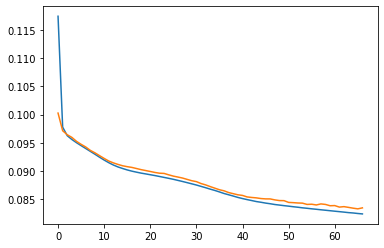

In [ ]:
pyplot.plot(train_loss_hist)
pyplot.plot(test_loss_hist)
